# Mock Company

**Abstract:** The Mock Company project attempts to emulate customer behavior for a subscription-based company.  The ultimate goal is to replicate user events with probable churn and customer acquisition events.

## Index:

1. Setup
2. New users generation
3. Generating cancellations
4. Generating output

## Code:

### Setup:

In [ ]:
import numpy as np
import uuid
import pandas as pd
import seaborn as sns
import random

### New users generation



For this code we will presume a higher growth rate in the first months, becoming smoothier as time goes by.  The function f(x) = 5*log(x) looked like a good function to represent such a growth.

In [ ]:
# generating users per week (counting 208 weeks for 4 years)

weeks = np.arange(1,(52*4),1,dtype=int)
user_base = [int(5*(1+np.log(x))) for x in weeks]

In [ ]:
# generating new subscription list

def generate_new_users_week(n_users, week):
  user_id = [uuid.uuid4() for i in range(n_users)]
  event = ["new_subscription" for i in range(n_users)]
  week = [week for i in range(n_users)]
  return {
      "user_id":user_id,
      "event":event,
      "week":week
  }

In [ ]:
# generating pandas with new subscrption per week

new_users = pd.DataFrame()
for week in weeks:
  new_users_week = generate_new_users_week(user_base[week-1], week)
  new_users_week_df = pd.DataFrame({
      "user_id":new_users_week['user_id'],
      "event":new_users_week['event'],
      "week":new_users_week['week']
  })
  new_users = new_users.append(new_users_week_df, ignore_index=True)

### Generating cancellations

Cancellations will be computed based on retention curve benchmarks.  For this experiment, I will be using the data on the link below:

https://www.geckoboard.com/best-practice/kpi-examples/retention-rate/#:~:text=Industry%20Benchmarks,is%2032%25%20to%2066%25.

I will be considering a retention on 42% on week 4, and of 25% on week 12 after initial subscription. I will also consider the percentage decrease linear on weeks 0 to 4, 4 to 12, and 12 onwards.

In [ ]:
def calculate_retention_rate(week):
  if week >= 0 and week <= 4: 
    beta = 1
    alpha = (1-0.42)/4
    init = week
  elif week > 4 and week <= 12: 
    beta = 0.42
    alpha = (0.42-0.25)/8
    init = week - 4
  else:
    beta = 0.25
    alpha = (0.25)/((52*4)-12)
    init = week - 12
  return (beta) - (init)*(alpha)

In [ ]:
retention_rates_by_week = [calculate_retention_rate(w) for w in weeks]

In [ ]:
retention_rates = pd.DataFrame(
    {
        "week":weeks,
        "retention_rate":retention_rates_by_week
    }
)

[Text(0.5, 1.0, 'Retention rate WoW')]

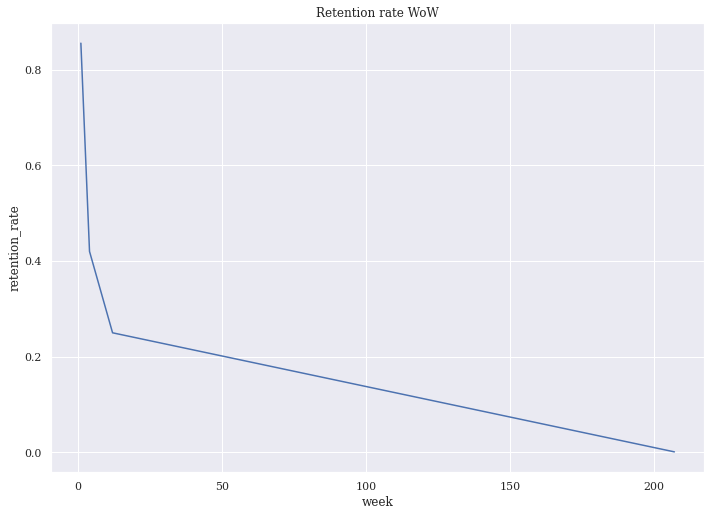

In [ ]:
# plotting retention curve

sns.set_theme()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.lineplot(data = retention_rates, x="week", y="retention_rate").set(title='Retention rate WoW')

In [ ]:
# sorting cancellations per week

def get_cancellations_from_subscriptions(week):

  random_gen = [random.random() for x in range(week, 52*4)]
  cancelled_week = None
  week_cnt = week
  for i in range(0,len(random_gen)):
    if (random_gen[i] <= retention_rates_by_week[i]):
      week_cnt+=1
    else:
      cancelled_week = week_cnt+1
      return int(cancelled_week)
  return cancelled_week

In [ ]:
subscriptions_w_cancelled = pd.DataFrame()
for week in weeks:
  new_users_week = new_users.query('week == '+str(week))
  cancellations = [get_cancellations_from_subscriptions(x) for x in new_users_week.week]
  new_users_week['cancel_week'] = cancellations
  subscriptions_w_cancelled = subscriptions_w_cancelled.append(new_users_week)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Generating output

In [ ]:
subscriptions_w_cancelled.to_csv("new_users_by_week.csv", index=False)

### Analyzing results:

In order to build a company report, I uploaded the generated csv data to Google Sheets.  I added the past relevant information on a Churn WoW tab.

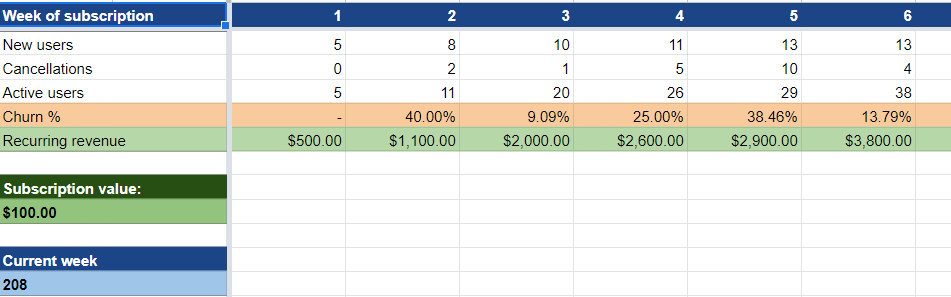

I also added relevant company goals to another tab, Sales Goals.  This information is very important, it allows us to make predictions on churn and active user base for future weeks.  I also plots an estimate of future indicators, which can be done with a Conservative, a Moderate and an Agressive scenarios, to be chosen in the main dashboard of the spreadsheet.


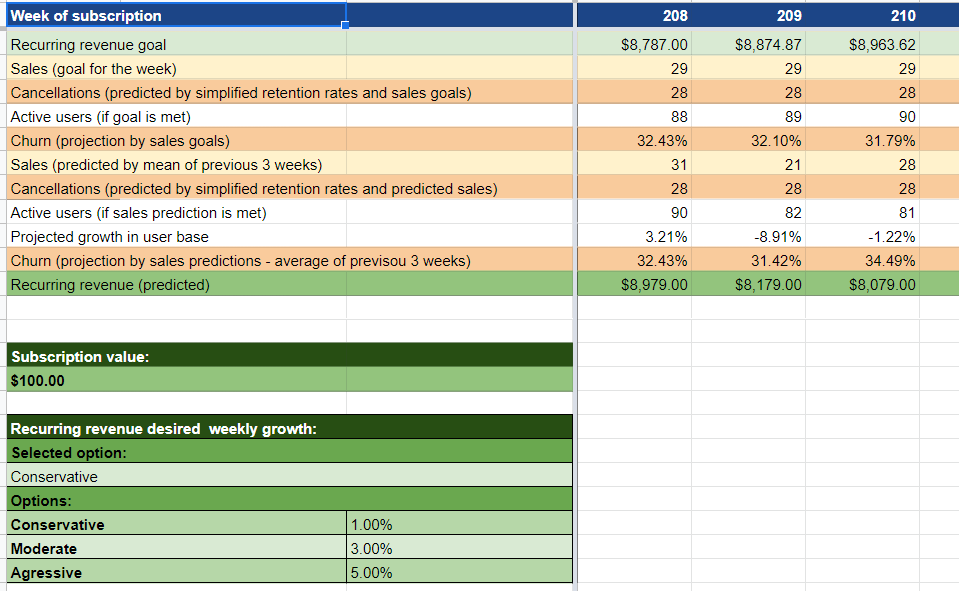

Finally, I added a main dashboard, with all key metrics for the present situation and for the next future of the company.  There are buttons with script associated actions to change the projection type.

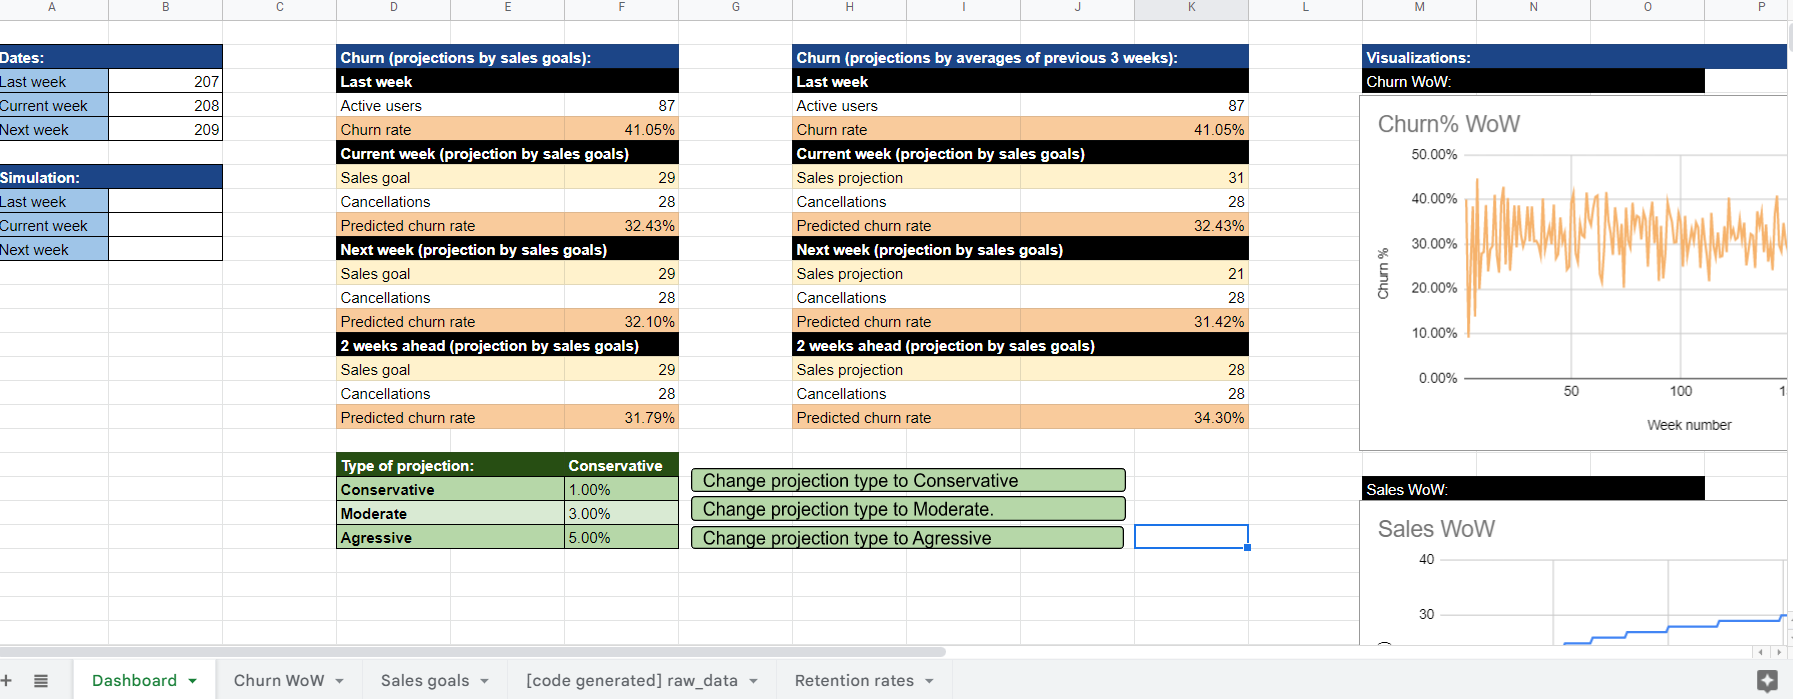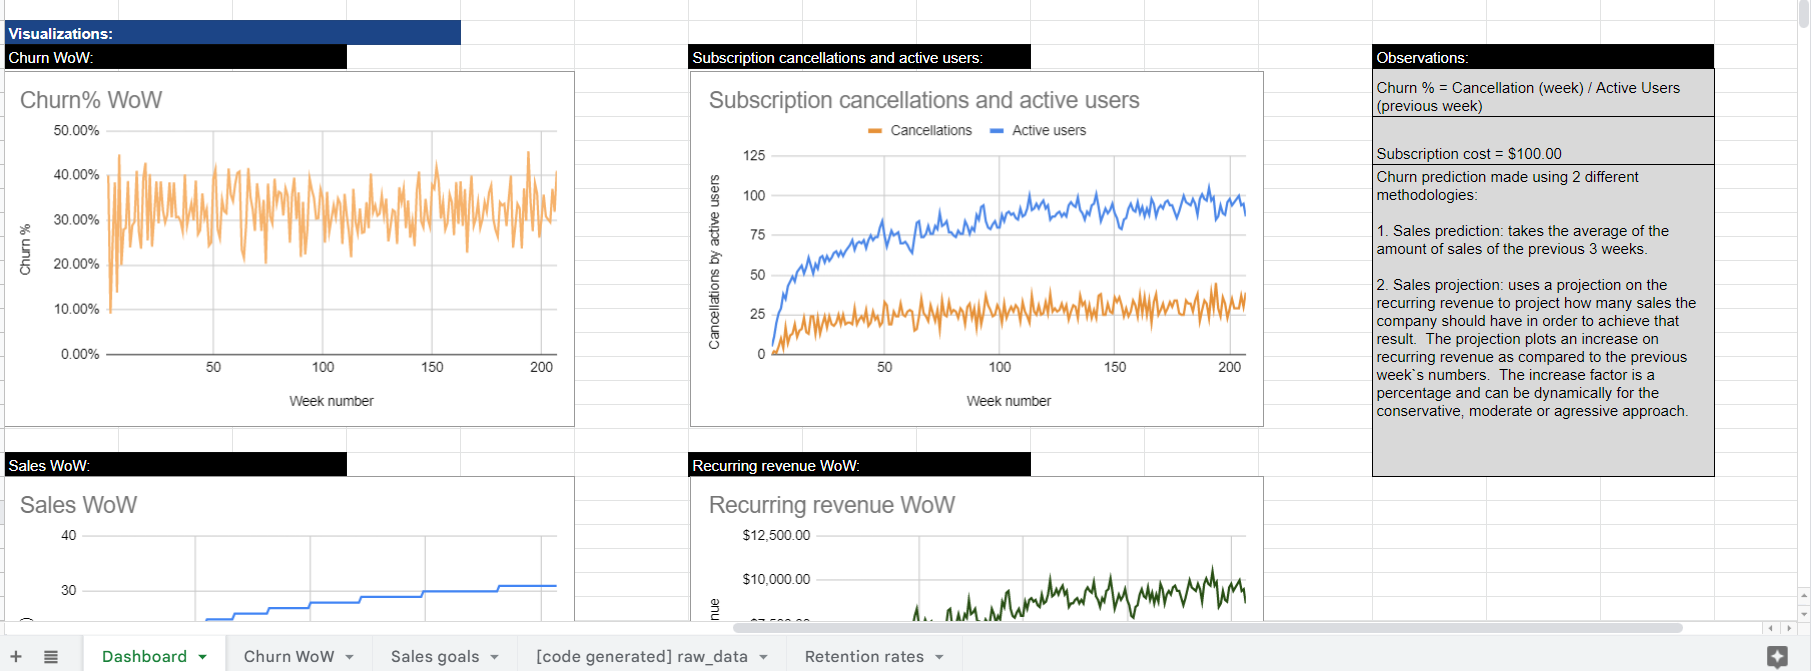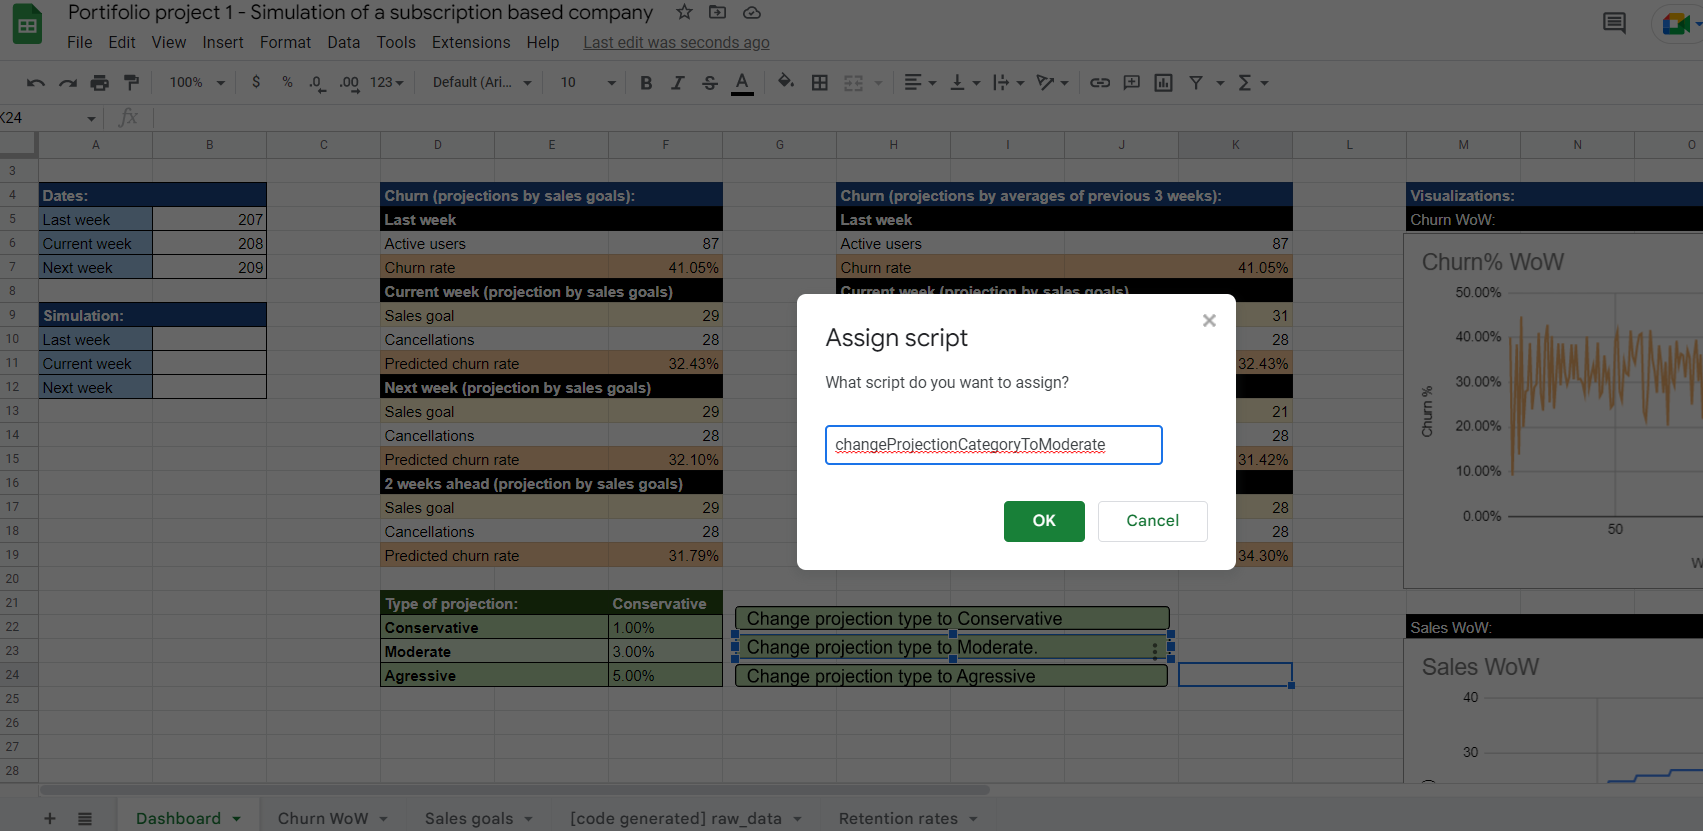

### Conclusions:



*   Churn is very high, has been going around 25% to 40% since the beginning of the company and has not lowered.  The market baseline is 5% or lower.  There is also a lot of variation, making it hard to predict the next weeks and months.
*   A conservative approach has the company earning averagelly 27 to 30 users a week, this will set a growth rate of $3000,00 on recurring revenue for the next 3 months.  It should be aiming for a more agressive growth target



